In [56]:
from matplotlib import pyplot as plt
import numpy as np

def plt_gca(x, y, ax = None, c=""):
    if ax is None:
        ax = plt.gca()

        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')

        ax.grid()

    ax.plot(x, y, c=c)

    return ax

Уравнение прямой линии - x + y = n, где n указывает смещение по x
к примеру x + y = 3, ему удовлетворяет множество пар значений x,y. К примеру A1(1;2), A2(2;1) и т.д. 

Уравнение вида x^2 + y^2 = n называется уравнением окружности, где корень от n указывает размерность окуржности.

In [40]:
def yline(x, n = 0):
    """
    Возвращает значения y по x для уравнения x + y = n
    """
    return -x - n

def ycircle(x, n = 0):
    """
    Возвращает значения y по x для уравнения x^2 + y^2 = n
    """
    return np.sqrt(-1 * np.power(x, 2) + n)


Посмотрим на вывод уравнения прямой линии

<AxesSubplot:>

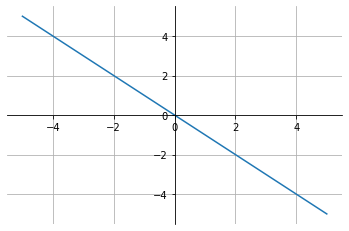

In [44]:
xline = np.linspace(-5, 5)

plt_gca(xline, yline(xline))

Посмотрим на вывод уравнения окружности

<AxesSubplot:>

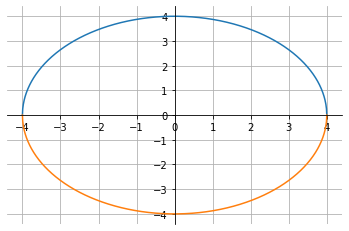

In [53]:
xcircle = np.linspace(-4, 4, 1000)

ax = plt_gca(xcircle, ycircle(xcircle, 16))
plt_gca(xcircle, -1 * ycircle(xcircle, 16), ax)

Чтобы проверить входит ли точка в окружность или линию, необходимо эту точку подставить в уравнение и если уравнение верно значит точка лежит на функции

x + y = 3
1 + 2 = 3 # Верно
1 + 4 = 5 # Не верно, не лежит на прямой

Уравнение прямой также можно записать с помощью уравнения вида y = k*x + b, где k тангенс угла наклона, а b смещение по y

In [49]:
def yline2(x, k , b):
    """
    y = k*x + b
    """
    return k * x + b

Text(0.5, 1.0, 'red - y = 2x + 1; blue - y = 2x; green - y = 0.36397023426620223x + 0')

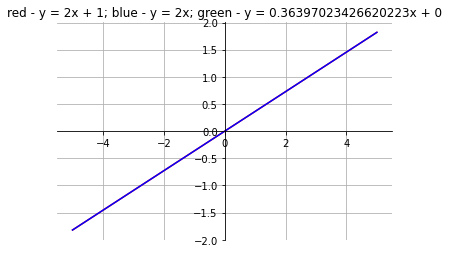

In [140]:
xline2 = np.linspace(-5, 5)

def grad2rad(rad):
    step = np.pi / 180

    return rad * step

k = np.tan(grad2rad(50))
b = 0

ax = plt_gca(xline2, yline2(xline2, k, b), c="red")
plt_gca(xline2, yline2(xline2, k, b), ax, c="blue")
# plt_gca(xline2, yline2(xline2, -k, b), ax, c="green")

ax.set_title("red - y = 2x + 1; blue - y = 2x; green - y = {}x + {}".format(k, b))

Чтобы проверить что точка находится на прямой в уравнении y = kx + b, необходимо уравнение приравнять к нулю и  подставить x,y и если уравнение верно то точка находится на линии

k*x - y + b = 0

Пример
2*x - y + 1 = 0



In [69]:
def line2haspoint(point : tuple, coef : tuple):
    """
    Аргументы
    =========
    point: tuple
        кортеж с координатами (x, y)
    coef: tuple 
        кортеж с параметрами уравнения (k, b)

    Возвращает:
    ===========
    bool
        Если уравнение равно нулю, то точка находится на прямой

    """
    x, y = point
    k, b = coef

    return (k * x - y + b) == 0

k = 2
b = 1
x1 = -2
y1 = yline2(x1, k, b)

print("x: {}; y: {}; {}".format(x1, y1, line2haspoint((x1, y1), (k, b))))

x2 = -1
y2 = yline2(x2, k, b)

print("x: {}; y: {}; {}".format(x2, y2, line2haspoint((x2, y2), (k, b))))

x3 = (x1 - x2) / 2 + x2
y3 = (y1 - y2) / 2 + y2

print("x: {}; y: {}; {}".format(x3, y3, line2haspoint((x3, y3), (k, b))))

x4 = -3
y4 = -3

print("x: {}; y: {}; {}".format(x4, y4, line2haspoint((x4, y4), (k, b))))

y4true = yline2(x4, k, b)

print("x: {}; y: {}; {}".format(x4, y4true, line2haspoint((x4, y4true), (k, b))))


x: -2; y: -3; True
x: -1; y: -1; True
x: -1.5; y: -2.0; True
x: -3; y: -3; False
x: -3; y: -5; True


Расстояние между двумя точками рассчитывается выражается формулой

d = sqrt((x2 - x1)^2 + (y2 - y1)^2)

In [76]:
def length(p1: tuple, p2: tuple):
    x1, y1 = p1
    x2, y2 = p2

    return np.sqrt(np.power(x2 - x1, 2) + np.power(y2 - y1, 2))

PA = (0, 0)
PB = (2, 2)
PC = (1, 2)
PD = (2, 0)

print(PA, PA, length(PA, PA))
print(PA, PB, length(PA, PB))
print(PA, PC, length(PA, PC))
print(PA, PD, length(PA, PD))

(0, 0) (0, 0) 0.0
(0, 0) (2, 2) 2.8284271247461903
(0, 0) (1, 2) 2.23606797749979
(0, 0) (2, 0) 2.0


Деление отрезка в данном отношении

выполняется следующим образом 

x = (m2 * x1 + m1 * x2) / (m1 + m2) |
y = (m2 * y1 + m1 * y2) / (m1 + m2) |

упрощенно, если представить m1:m2 = lambda
x = (x1 + lambda * x2) / (1 + lambda)
y = (y1 + lambda * y2) / (1 + lambda)

In [81]:
def getdelimitpoint(a:tuple, b:tuple, m1:float, m2:float):
    """
    Аргументы:
    ==========
    a : tuple
        координаты начала отрезка (x, y)
    b : tuple
        координаты конца отрезка (x, y)
    m1 : float
        соотношение 1
    m2 : float
        соотношение 2

    Возвращает:
    ===========
    tuple 
        координаты разделяющей точки (x, y)

    Примечание:
    ===========
    Возвращает точку делящую отрезок в соотношении m1 : m2
    lambda = m1 / m2

    x = (x1 + lambda * x2) / (1 + lambda)
    y = (y1 + lambda * y2) / (1 + lambda)
    """
    
    lmbda = m1 / m2

    x1, y1 = a
    x2, y2 = b

    x = (x1 + lmbda * x2) / (1 + lmbda)
    y = (y1 + lmbda * y2) / (1 + lmbda)

    return (x, y)

A = (1,1)
B = (4, 2)
O = (2.2, 1.4) # Координаты разделяющей для соотношения 2:3 равны O(2.2; 1.4)

print(A, B, getdelimitpoint(A, B, 2, 3), getdelimitpoint(A, B, 2, 3) == O)

(1, 1) (4, 2) (2.2, 1.4) True


Определитель второго порядка считается по следующему принципу:

Даны 2 вектора a, b
a = [a11, a12] # направление x
b = [b21, b22] # направление y

det |a x b| = |a11 a12| = a11 * b22 - a12 * b21
              |b21 b22|

a = |1 0| = 1 * 1 - 0 * 0 = 1
    |0 1|

Если определитель системы векторов (a, b) больше 0 то система направлена как оси координат (x, y)
Если определитель системы векторов (a, b) меньше 0 то система направлена противоположно оси координат

https://scask.ru/a_lect_math1.php?id=38

Text(0.5, 1.0, 'red, blue - ax, green, yellow - ay. Определитель 1 равен 1.0, определитель 2 равен -1.0')

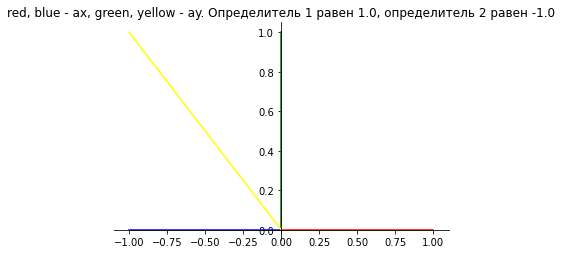

In [93]:
ax1 = np.array([1, 0])
ay1 = np.array([0, 1])

c1 = np.linalg.det([ax1, ay1])

ax = plt_gca([0, ax1[0]], [0, ax1[1]], c="red")
plt_gca([0, ay1[0]], [0, ay1[1]], ax, c="green")

ax2 = np.array([-1, 0])
ay2 = np.array([-1, 1])

c2 = np.linalg.det([ax2, ay2])

ax = plt_gca([0, ax2[0]], [0, ax2[1]], c="blue")
plt_gca([0, ay2[0]], [0, ay2[1]], ax, c="yellow")

ax.set_title("red, blue - ax, green, yellow - ay. Определитель 1 равен {}, определитель 2 равен {}".format(c1, c2))

In [25]:
from collections import namedtuple
import numpy as np

def __get_val(x):
    if isinstance(x, np.ndarray):
        return x
    elif isinstance(x, list):
        return np.array(x)
    elif isinstance(x, tuple):
        return np.array(x)
    elif isinstance(x, float) or isinstance(x, int):
        return np.array(x)
    
    raise ValueError("Input value must be number or array")

class Vector2D(namedtuple("Vector2D", ['x', 'y'])):
    def __init__(self, x, y):
        super(Vector2D, self).__init__()

        self.x = np.array(x)
        self.y = np.array(y)

    def __str__(self):
        return "Vector2D x={} y={}".format(self.x, self.y)


%matplotlib inline

In [27]:
a = np.array([1,2,3])

b = np.array([2,4,7])

print(a / b)

[0.5 0.5 0.5]
